In [70]:
# Map top publishing authors/institutes in PDB research. Write briefly about your findings and challenges faced in analysing this data.

In [103]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [104]:
# Load your JSON data
with open("../data/europepmc_articles.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Create DataFrame
df = pd.DataFrame(data)

In [105]:
# Filter for PDB-linked publications
pdb_df = df[df["pdb_linked"] == True]

In [107]:
# Split authors and affiliations into list columns
pdb_df.loc[:, "authors"] = pdb_df["author_string"].str.split(", ")
pdb_df

,pubmed_id,doi,title,author_string,orcids,affiliations,year,journal_title,journal_volume,journal_issue,...,is_open_access,publication_status,publication_model,cited_by_count,mesh_terms,chemicals,grants,full_text_urls,pdb_linked,authors
0,38744987,10.1038/s41589-024-01619-z,The β-subunit of tryptophan synthase is a late...,"Almhjell PJ, Johnston KE, Porter NJ, Kennemur ...","[0000-0003-0977-841X, 0000-0002-2214-3534, 000...","[Department of Biochemistry, Stanford Universi...",2024,Nature chemical biology,20,8,...,False,ppublish,Print-Electronic,8,"[Tyrosine Phenol-Lyase, Tryptophan Synthase, T...","[Tryptophan Synthase, Protein Subunits, Tyrosi...","[NIGMS NIH HHS, U.S. Department of Health &amp...","[https://doi.org/10.1038/s41589-024-01619-z, h...",True,"[Almhjell PJ, Johnston KE, Porter NJ, Kennemur..."
1,39656918,10.1093/nar/gkae1121,The C-terminal PHDVC5HCH tandem domain of NSD2...,"Berardi A, Kaestner CL, Ghitti M, Quilici G, C...","[0000-0001-5702-3674, 0000-0001-5995-6494, 000...","[Institute for Pharmaceutical Chemistry, Johan...",2025,Nucleic acids research,53,1,...,True,ppublish,Print,2,"[Cell Line, Tumor, Humans, Multiple Myeloma, H...","[Histones, Repressor Proteins, Histone-Lysine ...","[NCI NIH HHS, EMBO, FEBS, NIH HHS, CINECA, Flo...","[https://doi.org/10.1093/nar/gkae1121, https:/...",True,"[Berardi A, Kaestner CL, Ghitti M, Quilici G, ..."
2,39658312,10.1111/febs.17347,Structural elucidation and characterization of...,"Yang Y, Holck J, Thorhallsson AT, Hunt CJ, Yan...","[0000-0002-8072-1101, 0000-0002-4003-7647, 000...",[Section for Protein Chemistry and Enzyme Tech...,2025,The FEBS journal,292,3,...,True,ppublish,Print-Electronic,0,"[Humans, alpha-L-Fucosidase, Oligosaccharides,...","[alpha-L-Fucosidase, Oligosaccharides, Bacteri...","[DTU Bioengineering, Technical University of D...","[https://doi.org/10.1111/febs.17347, https://e...",True,"[Yang Y, Holck J, Thorhallsson AT, Hunt CJ, Ya..."
3,37943932,10.1126/science.abo7201,Open science discovery of potent noncovalent S...,"Boby ML, Fearon D, Ferla M, Filep M, Koekemoer...","[0000-0003-3529-7863, 0009-0003-7288-9769, 000...","[Sloan Kettering Institute, Memorial Sloan Ket...",2023,"Science (New York, N.Y.)",382,6671,...,True,ppublish,Print-Electronic,74,"[Humans, Crystallography, X-Ray, Structure-Act...","[Coronavirus 3C Proteases, 3C-like proteinase,...",[Engineering and Physical Sciences Research Co...,"[https://doi.org/10.1126/science.abo7201, http...",True,"[Boby ML, Fearon D, Ferla M, Filep M, Koekemoe..."
4,40537411,10.1002/anie.202510889,Is a Malleable Active Site Loop the Key to Hig...,"Kudalkar GP, Leidner F, Kumar N, Hass JL, Madz...",[0000-0001-7550-0112],"[Department of Chemistry and Biochemistry, Uni...",2025,Angewandte Chemie (International ed. in English),None,None,...,False,aheadofprint,Print-Electronic,0,[],[],"[NSF, NIH HHS, U.S. Department of Energy, Offi...",[https://doi.org/10.1002/anie.202510889],True,"[Kudalkar GP, Leidner F, Kumar N, Hass JL, Mad..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,32991844,10.1016/j.cell.2020.09.037,Mapping Neutralizing and Immunodominant Sites ...,"Piccoli L, Park YJ, Tortorici MA, Czudnochowsk...","[0000-0003-2901-6949, 0000-0002-9636-8330, 000...","[Humabs BioMed SA, Vir Biotechnology, 6500 Bel...",2020,Cell,183,4,...,True,ppublish,Print-Electronic,1132,"[Humans, Pneumonia, Viral, Coronavirus Infecti...","[Antibodies, Viral, Immunoglobulin G, Immunogl...",[National Institute of General Medical Science...,"[https://doi.org/10.1016/j.cell.2020.09.037, h...",True,"[Piccoli L, Park YJ, Tortorici MA, Czudnochows..."
894,32745361,10.1002/anie.202008361,A Photoaffinity-Based Fragment-Screening Platf...,"Grant EK, Fallon DJ, Hann MM, Fantom KGM, Quin...","[0000-0003-4644-8399, 0000-0002-5509-0133, 000...","[GlaxoSmithKline, Gunnels Wood Road, Stevenage...",2020,Angewandte Chemie (International ed. in English),59,47,...,False,ppublish,Print-Electronic,29,"[Humans

In [108]:
# Explode for counting
author_exploded = pdb_df.explode("authors")
affiliation_exploded = pdb_df.explode("affiliations")
affiliation_exploded

,pubmed_id,doi,title,author_string,orcids,affiliations,year,journal_title,journal_volume,journal_issue,...,is_open_access,publication_status,publication_model,cited_by_count,mesh_terms,chemicals,grants,full_text_urls,pdb_linked,authors
0,38744987,10.1038/s41589-024-01619-z,The β-subunit of tryptophan synthase is a late...,"Almhjell PJ, Johnston KE, Porter NJ, Kennemur ...","[0000-0003-0977-841X, 0000-0002-2214-3534, 000...","Department of Biochemistry, Stanford Universit...",2024,Nature chemical biology,20,8,...,False,ppublish,Print-Electronic,8,"[Tyrosine Phenol-Lyase, Tryptophan Synthase, T...","[Tryptophan Synthase, Protein Subunits, Tyrosi...","[NIGMS NIH HHS, U.S. Department of Health &amp...","[https://doi.org/10.1038/s41589-024-01619-z, h...",True,"[Almhjell PJ, Johnston KE, Porter NJ, Kennemur..."
0,38744987,10.1038/s41589-024-01619-z,The β-subunit of tryptophan synthase is a late...,"Almhjell PJ, Johnston KE, Porter NJ, Kennemur ...","[0000-0003-0977-841X, 0000-0002-2214-3534, 000...",Division of Biology and Biological Engineering...,2024,Nature chemical biology,20,8,...,False,ppublish,Print-Electronic,8,"[Tyrosine Phenol-Lyase, Tryptophan Synthase, T...","[Tryptophan Synthase, Protein Subunits, Tyrosi...","[NIGMS NIH HHS, U.S. Department of Health &amp...","[https://doi.org/10.1038/s41589-024-01619-z, h...",True,"[Almhjell PJ, Johnston KE, Porter NJ, Kennemur..."
0,38744987,10.1038/s41589-024-01619-z,The β-subunit of tryptophan synthase is a late...,"Almhjell PJ, Johnston KE, Porter NJ, Kennemur ...","[0000-0003-0977-841X, 0000-0002-2214-3534, 000...","Merck & Co., Inc, South San Francisco, CA, USA.",2024,Nature chemical biology,20,8,...,False,ppublish,Print-Electronic,8,"[Tyrosine Phenol-Lyase, Tryptophan Synthase, T...","[Tryptophan Synthase, Protein Subunits, Tyrosi...","[NIGMS NIH HHS, U.S. Department of Health &amp...","[https://doi.org/10.1038/s41589-024-01619-z, h...",True,"[Almhjell PJ, Johnston KE, Porter NJ, Kennemur..."
0,38744987,10.1038/s41589-024-01619-z,The β-subunit of tryptophan synthase is a late...,"Almhjell PJ, Johnston KE, Porter NJ, Kennemur ...","[0000-0003-0977-841X, 0000-0002-2214-3534, 000...","Codexis, Inc., Redwood City, CA, USA.",2024,Nature chemical biology,20,8,...,False,ppublish,Print-Electronic,8,"[Tyrosine Phenol-Lyase, Tryptophan Synthase, T...","[Tryptophan Synthase, Protein Subunits, Tyrosi...","[NIGMS NIH HHS, U.S. Department of Health &amp...","[https://doi.org/10.1038/s41589-024-01619-z, h...",True,"[Almhjell PJ, Johnston KE, Porter NJ, Kennemur..."
0,38744987,10.1038/s41589-024-01619-z,The β-subunit of tryptophan synthase is a late...,"Almhjell PJ, Johnston KE, Porter NJ, Kennemur ...","[0000-0003-0977-841X, 0000-0002-2214-3534, 000...",Division of Chemistry and Chemical Engineering...,2024,Nature chemical biology,20,8,...,False,ppublish,Print-Electronic,8,"[Tyrosine Phenol-Lyase, Tryptophan Synthase, T...","[Tryptophan Synthase, Protein Subunits, Tyrosi...","[NIGMS NIH HHS, U.S. Department of Health &amp...","[https://doi.org/10.1038/s41589-024-01619-z, h...",True,"[Almhjell PJ, Johnston KE, Porter NJ, Kennemur..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,31588918,10.1107/s2059798319011471,Macromolecular structure determination using X...,"Liebschner D, Afonine PV, Baker ML, Bunkóczi G...","[0000-0003-3921-3209, 0000-0002-5052-991X, 000...","Centre for Integrative Biology, Institut de Gé...",2019,"Acta crystallographica. Section D, Structural ...",75,Pt 10,...,True,ppublish,Print-Electronic,4244,"[Macromolecular Substances, Cryoelectron Micro...",[Macromolecular Substances],"[NIGMS NIH HHS, NIH HHS, Wellcome Trust, Wellc...","[https://doi.org/10.1107/S2059798319011471, ht...",True,"[Liebschner D, Afonine PV, Baker ML, Bunkóczi ..."
895,31588918,10.1107/s2059798319011471,Macromolecular structure determination using X...,"Liebschner D, Afonine PV, Baker ML, Bunkóczi G...","[0000-0003-3921-3209, 0000-0002-5052-991X, 000...","Los

In [109]:
import re

# Step 1: Clean and standardize author names
def normalize_author(name):
    if not isinstance(name, str):
        return ""
    # Remove punctuations, extra spaces, lowercase
    name = re.sub(r"[.,]", "", name.strip())
    name = re.sub(r"\s+", " ", name)
    return name.lower()

In [102]:
# Challenges in Analyzing Author Names:

# Problems Handled:
# Trailing periods: Removes a period at the end of the string using re.sub(r"\.$", "", ...).
# Leading/trailing whitespace: Uses strip() to remove spaces before and after the name.
# Multiple internal spaces: Replaces any sequence of whitespace with a single space using re.sub(r"\s+", " ", ...).
# Case normalization: Converts the entire string to lowercase with .lower() to avoid case-based mismatches.
# Non-string values: Returns an empty string ("") for non-string inputs to avoid errors like AttributeError.

# Problems not handled
# Reversed name formats: Does not handle "Smith, John" vs. "John Smith" — those will normalize to different strings.
# Initials vs. full names: "J Smith" and "John Smith" normalize differently even if referring to the same person.
# Diacritics and Unicode normalization: Names like "José" vs. "Jose" are treated as distinct — no Unicode normalization is applied.
# Middle names or initials: "John Q. Smith" and "John Smith" are treated as different names without further standardization logic.
# No disambiguation logic: Multiple authors with the same normalized name are not distinguished further (e.g., via affiliation or ORCID).

# Ideally we would want to store affiliations in a dictionary mapped to a three letter code or some sort of relational database which will provide a way to efficiently rank them.


In [110]:
# Apply normalization
author_exploded["authors_normalized"] = author_exploded["authors"].apply(normalize_author)

# Step 2: Count normalized authors
top_authors = author_exploded["authors_normalized"].value_counts().head(10)
top_authors

authors_normalized
wang y     31
zhang y    25
li j       19
wang c     19
zhang x    18
liu y      18
li x       18
wang j     18
zhang j    16
chen y     15
Name: count, dtype: int64

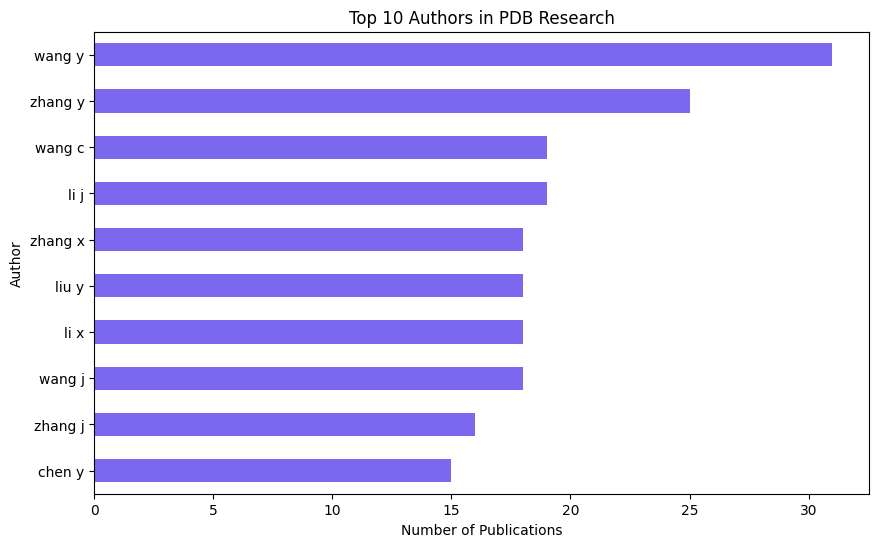

In [120]:
# Horizontal bar graph of top 10 authors

# Plot using matplotlib
plt.figure(figsize=(10, 6))
top_authors.sort_values().plot(kind='barh', color='mediumslateblue')
plt.title('Top 10 Authors in PDB Research')
plt.xlabel('Number of Publications')
plt.ylabel('Author')
plt.show()

In [89]:
# Normalise affiliations
def preprocess_institution(text: str) -> str:
    if not isinstance(text, str):
        text = ""
    text = text.lower()
    text = re.sub(r"\d+", "", text)          # Remove numbers
    text = re.sub(r"\s+", " ", text)         # Normalize whitespace
    words = text.strip().split(", ")
    return " ".join(words[:2])

In [99]:
# Challenges Handled by Function
# Lowercasing for uniformity: All text is converted to lowercase to avoid case-sensitive duplicates (e.g., "Harvard" vs. "harvard").
# Whitespace normalization: Consecutive spaces are collapsed to single spaces for cleaner matching.
# Removal of numeric codes: Removes building numbers, postal codes, and grant-related numerics which aren’t useful for affiliation identity.
# Truncating to top levels: By taking only the first two comma-separated parts, I am roughly capturing the "organization + department" granularity.


# Challenges Not Handled

# Duplicate but reordered terms: "Stanford University, Department of Biochemistry" vs. "Department of Biochemistry, Stanford University" are treated as different entities.
# Missing or non-standard punctuation: Some entries may have semicolons, slashes, or multiple nested commas which may confuse the split.
# Foreign-language or abbreviated names: "Université de Montréal" vs. "University of Montreal" won't match

# Ideally we would want to store affiliations in a dictionary mapped to a three letter code or some sort of relational database which will provide a way to efficiently rank them.



In [115]:
# Apply to exploded affiliations
affiliation_exploded["normalized_affiliation"] = affiliation_exploded["affiliations"].apply(preprocess_institution)

# Count the top occurrences
top_normalized_affils = affiliation_exploded["normalized_affiliation"].value_counts().head(10)
top_normalized_affils

normalized_affiliation
university of chinese academy of sciences beijing                                                                           31
department of biochemistry university of washington                                                                         19
institute of biological chemistry academia sinica                                                                           17
department of chemistry and biochemistry university of california                                                           14
institut pasteur université paris cité                                                                                      14
cas key laboratory of pathogen microbiology and immunology institute of microbiology                                        14
department of integrative structural and computational biology the scripps research institute                               14
vaccine research center national institute of allergy and infectious diseases           

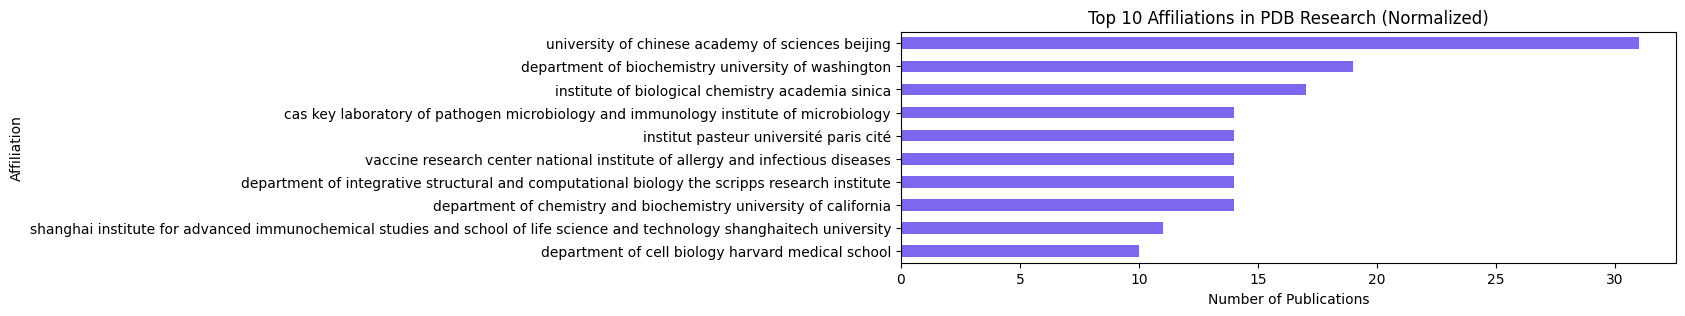

In [119]:
# # Horizontal bar graph of top 10 affiliations
# Plot using matplotlib
plt.figure(figsize=(10, 3))
top_normalized_affils.sort_values().plot(kind='barh', color='mediumslateblue')
plt.title('Top 10 Affiliations in PDB Research (Normalized)')
plt.xlabel('Number of Publications')
plt.ylabel('Affiliation')
plt.show()